In [ ]:
# benchfellaの出力ファイルからグラフを出力するための関数群

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
import os
import sys
import numpy as np
import time

%matplotlib inline

In [16]:
# confing
FILE_NAME = "2020-03-01_19-37-13.snapshot"

In [17]:
## about file_path
SNAPSHOT_IN_DIR_NAME = "../snapshots"
SAVE_GRAPH_PNG_IN_DIR = "graphs"

FILE_PATH = os.path.join(SNAPSHOT_IN_DIR_NAME, FILE_NAME)

## about graph
GRAPH_TITLE = "parallel sum performanx/each data size"
X_LABEL = "bench mark name(data size)"
Y_LABEL = "average time(µs/op)"
GRAPH_SIZE = (8, 6)

## n_dim_func
funcs = {
    "1": lambda row: row[0]
}

FILE_PATH

'../snapshots/2020-03-01_19-37-13.snapshot'

In [18]:
# utils
def extraction_index(two_dim_lst, idx):
        """
            TASK: 2次元リストから特定のindexを抽出
            two_dim_lst([][]interface) -> 特定の２次元リスト
            idx(int) -> 取得したいindex番号
        """
        return [row[idx] for row in two_dim_lst] 

def read_snap_shot(file_path):
    """
        TASK: .snaphostファイルの読み込みと配列への変換
        file_path(str) -> 対象のスナップショットへのファイルパス
        return []str
    """
    with open(file_path) as f:
        return f.read().split("\n")[2:-1]
    

def adj_row_lst(row_lst):
    """
        TASK: .snapshotを読み込み生成した[]strをグラフ描画のために整形
        row_lst([]str) -> read_snap_shot()によって生成された配列
        return [][str, float]
    """
    # rowデータをsplitして配列に変換
    rm_module_name = list(map(lambda row: list(filter(lambda x: x, row.split("\t"))), row_lst))
    # module名が不要なので除去
    split_by_title = list(map(lambda row: row[1:], rm_module_name))
    # 経過時間をiteration数で割り平均実行時間を算出
    calced = list(map(lambda row: [row[0].split(" ")[-1], int(row[2]) / int(row[1])], split_by_title))
    return calced


def plot_bar(graph_title, adj_row_lst, is_save=False):
    """
        TASK: 整形を行なったデータを棒グラフで描画
        graph_title(str) -> グラフに描画するタイトル
        adj_row_lst([][str, float]) -> adj_row_lst()によって生成された描画用配列
        return None
    """    
    # 出力グラフサイズの変更
    plt.figure(figsize=GRAPH_SIZE)
    # 棒グラフの設定
    plt.bar(
        x=extraction_index(adj_row_lst, 0),
        height=extraction_index(adj_row_lst, 1),
        width=0.7
    )

    # グラフタイトルなどの設定
    # y軸を10^n　の指数表記に変更
    plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0)) 
    ptick.ScalarFormatter(useMathText=True)
    
    plt.title(graph_title)
    plt.xlabel(X_LABEL)
    plt.ylabel(Y_LABEL)
    plt.grid(True)
    
    # keyの指定があれば現在時間+タイトルで.png形式で画像を保存
    if is_save:
        title_name = graph_title
        if len(graph_title.split(" ")) > 0:
            title_name = graph_title.replace(" ", "_")
        plt.savefig(os.path.join("../", SAVE_GRAPH_PNG_IN_DIR,  f'{time.time()}_{title_name}.png'))
        
    plt.show()


def each_ploter(row_lst, iter_num, titles, is_save=False):
    """
        TASK: 面倒なデータ分割と描画処理をまとめて行う
        row_lst([]str) -> read_snap_shot()にてファイルから読み込んで生成した配列
        iter_num(int) -> 配列を何要素ごとに分割するか
        titles([]str) -> グラフに使用するタイトル群
        is_save(bool) False -> グラフを画像として保存するかどうか
        return None
    """
    def _calc_iter(lst, iter_num):
        """
            TASK: 受け取ったリストと分割要素数よりiterationを何度行うかを算出する
            lst([]interface) -> read_snap_shot()にてファイルから読み込んで生成した配列
            iter_num(int) -> 配列を何要素ごとに分割するか
            return int
        """
        lst_size = len(lst)
        if lst_size % iter_num == 0:
            return lst_size // iter_num
        return (lst_size // iter_num) + 1

    total_iter = _calc_iter(row_lst, iter_num)
    assert total_iter == len(titles), "Not match splited data size from titles"

    for i in range(0, total_iter):
        res = adj_row_lst(row_lst[iter_num*i:iter_num*(i+1)])
        plot_bar(titles[i], res, is_save)

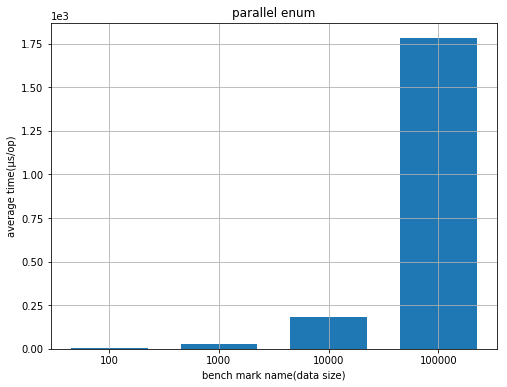

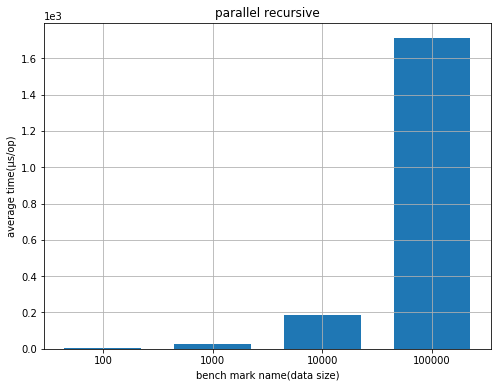

In [21]:
# ファイルを読み込んで配列に変換
row_lst = read_snap_shot(FILE_PATH)
# ベンチマークごと(5つ)にグラフをプロットして保存
each_ploter(row_lst, 4, ["parallel enum", "parallel recursive"], True)